In [12]:
# read code tools
# share in https://gist.github.com/WuShaogui/19c690bde2a0fe70b061d50e20129531
import sys
import os.path as osp
sys.path.append('/home/wushaogui/ReadCode/')
from my_read_code_tools import *

In [1]:
import cv2
import numpy as np

## 基于距离的分水岭算法

(312, 252, 3)


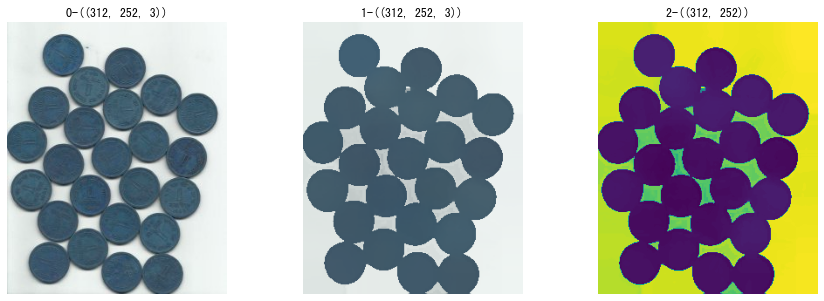

In [14]:
image=cv2.imread("images/Image_watershed_coins.jpg")
print(image.shape)

# 前提：降噪
blurred = cv2.pyrMeanShiftFiltering(image, 25, 100)
gray=cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
show_images([image,blurred,gray],nrows=1)

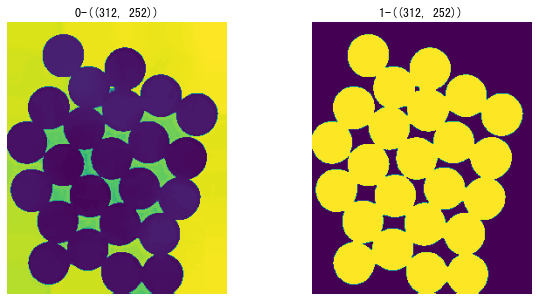

In [15]:
# 二值化
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
show_images([gray,thresh])

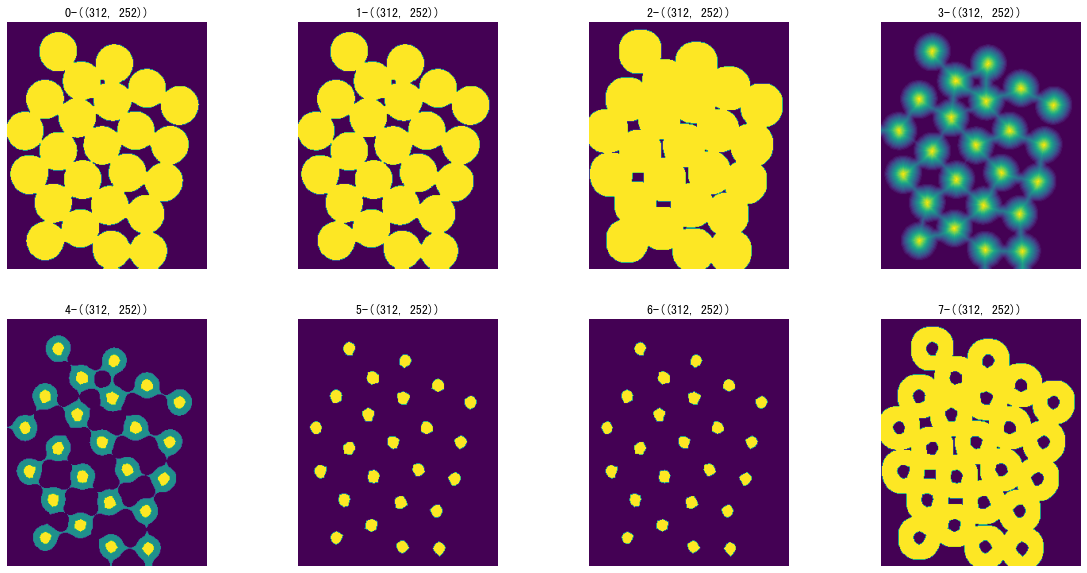

In [18]:
# 分析'确定背景区域','确定前景区域','未知区域' 3个区域
# 开运算：移出噪声
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations =2)

# 膨胀：得到确定的背景区域
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# 得到确定的前景区域
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
dist_output = cv2.normalize(dist_transform, 0, 1.0, cv2.NORM_MINMAX) #归一化
ret, sure_fg = cv2.threshold(dist_output,0.7*dist_output.max(),255,0)
ret1, sure_fg1 = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# 确定的背景区域-确定的前景区域=未知区域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

show_images([thresh,opening,sure_bg,dist_transform,dist_output*255,sure_fg,sure_fg1,unknown],ncols=4)

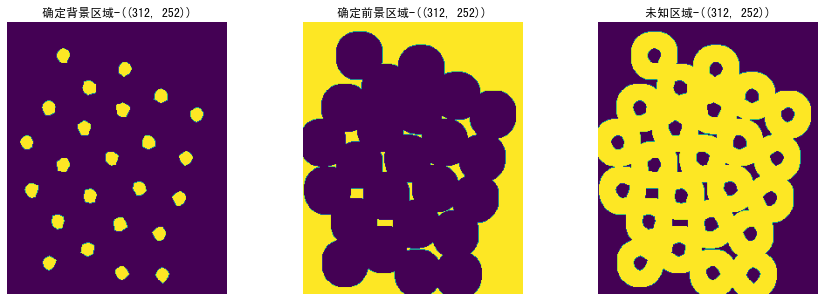

In [24]:
# '确定背景区域','确定前景区域','未知区域' 3个区域
show_images([sure_fg,sure_bg-255,unknown],titles=['确定背景区域','确定前景区域','未知区域'],nrows=1)

[0, 255]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


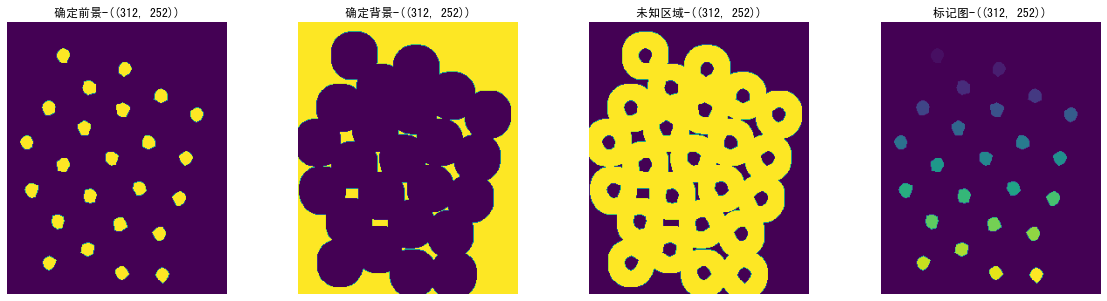

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


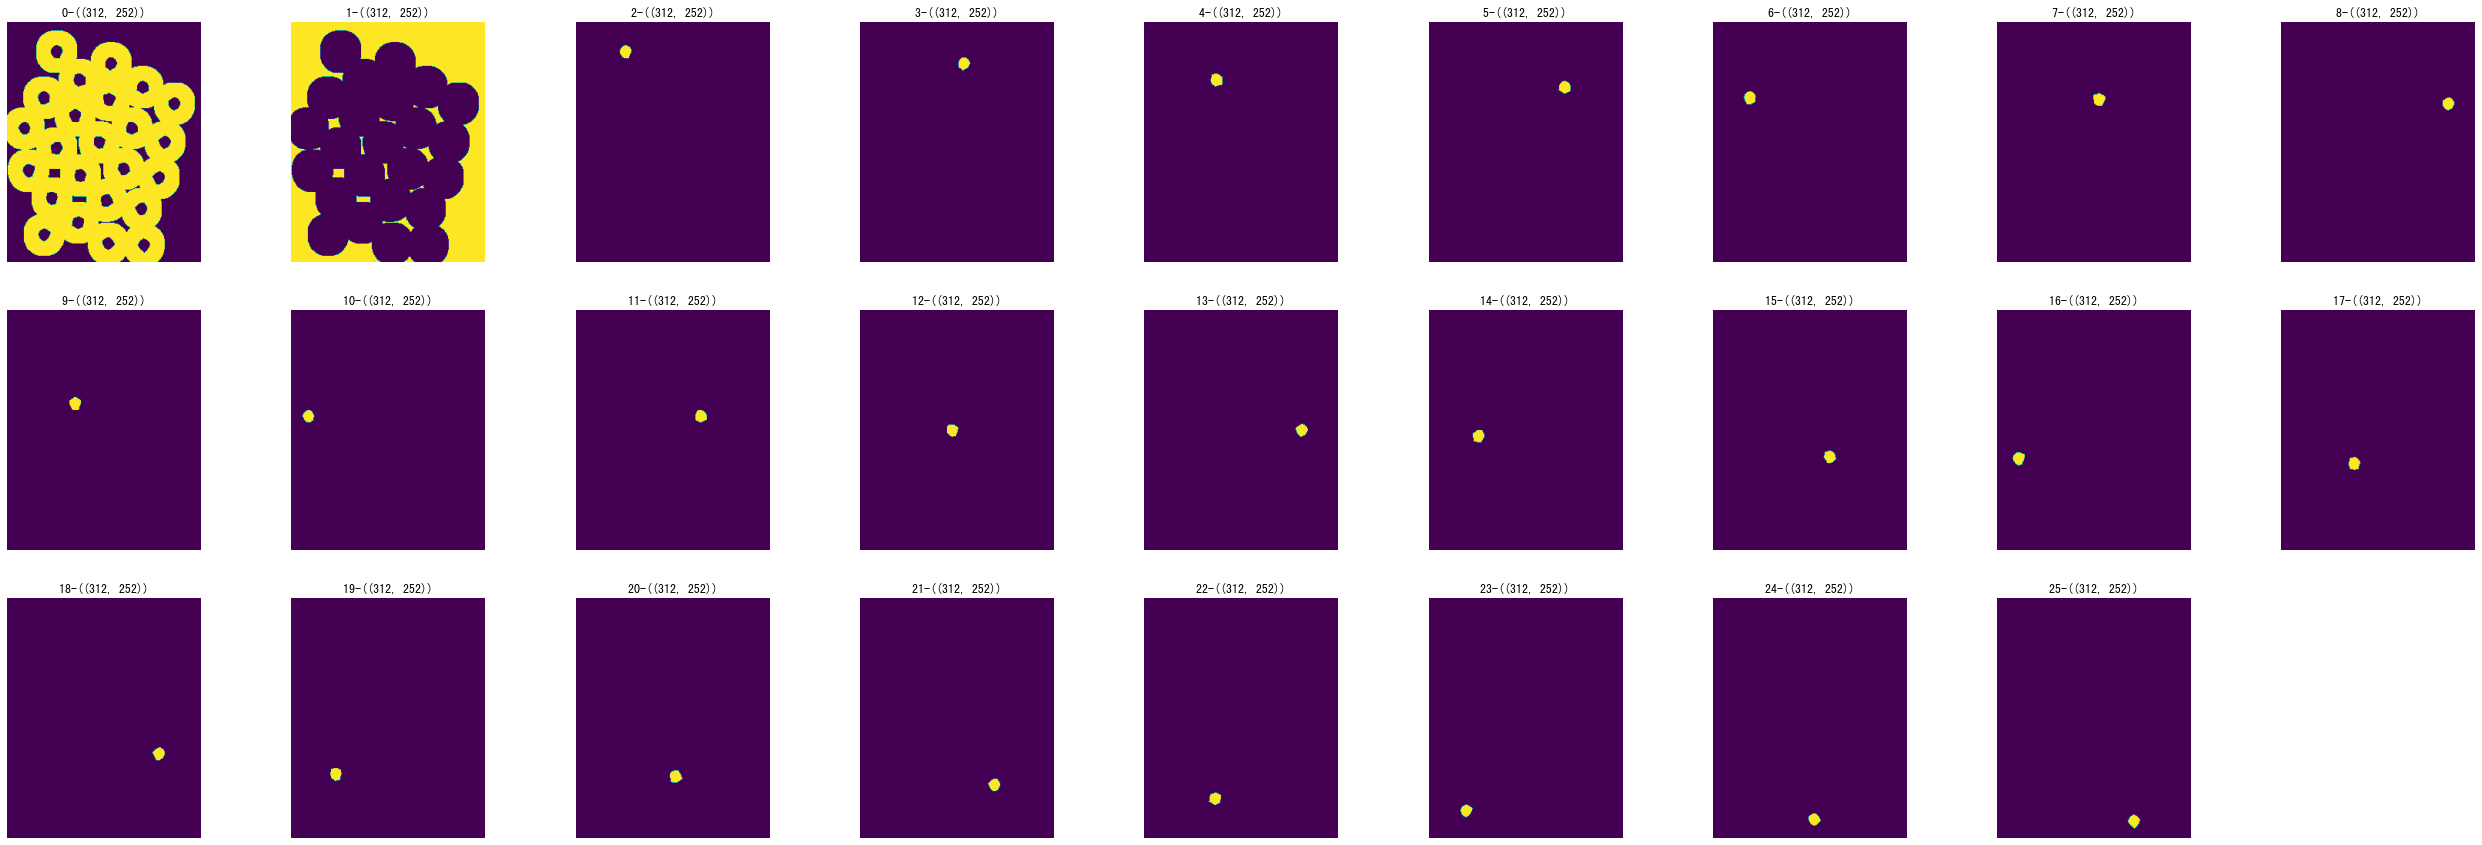

In [38]:
# 制作markers
ret, markers = cv2.connectedComponents(sure_fg)
print(list(np.unique(sure_fg))) # 联通区域值情况
print(list(np.unique(markers))) # markers值情况
show_images([sure_fg,sure_bg-255,unknown,markers],nrows=1,
            titles=["确定前景","确定背景","未知区域","标记图"])

# markers所有值+1，确保值从1开始
markers = markers+1

# 使用0值标记背景区域
markers[unknown==255]=0
print(list(np.unique(markers)))

show_images([markers==i for i in range(26)],nrows=3)

[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


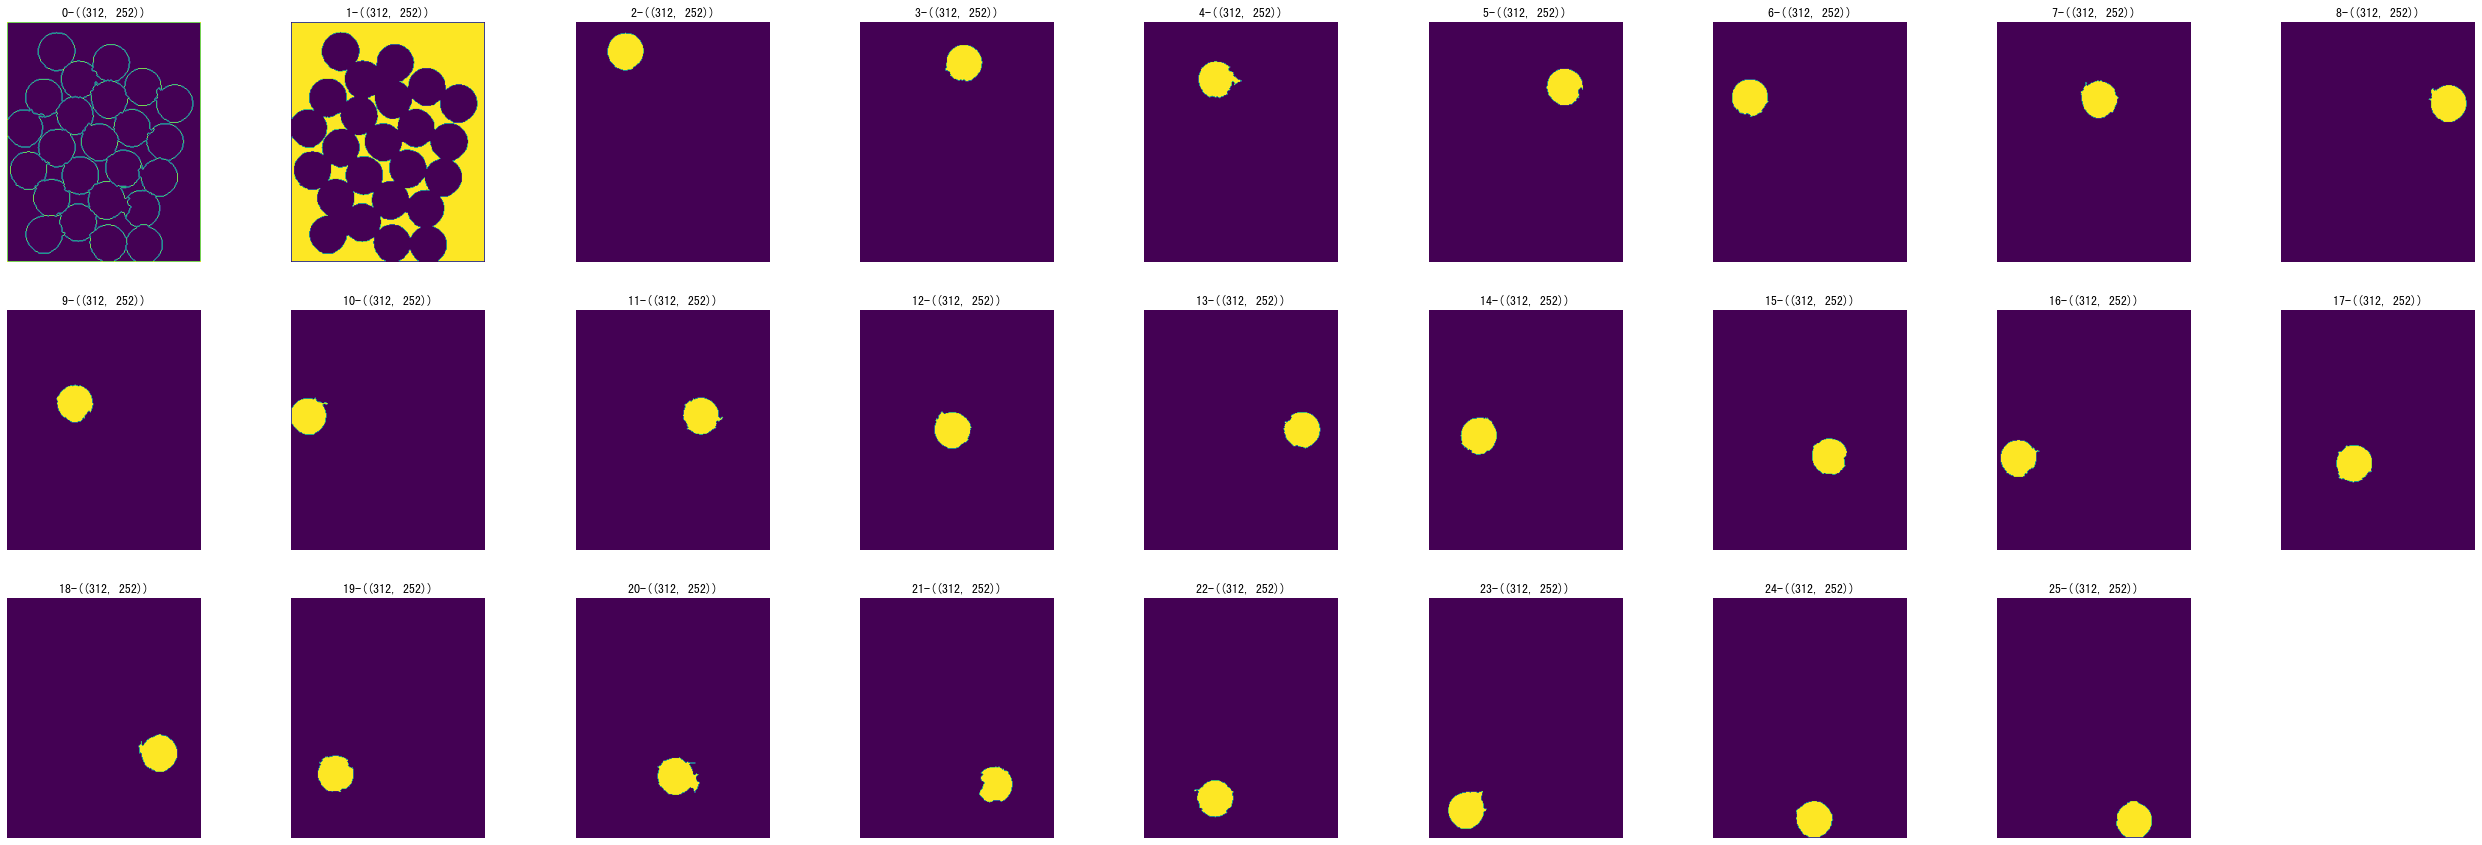

In [37]:
# 分水岭算法，并输出所有序号的位置
output = cv2.watershed(image,markers)
indexs=list(np.unique(output))
print(indexs)
show_images([output==i for i in indexs],nrows=3)

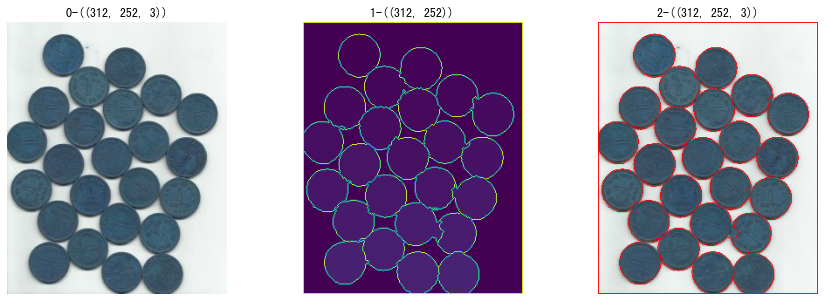

In [33]:
# 渲染确定前景与确定背景的边界
image_copy=image.copy()
image_copy[markers ==-1]=[255,0,0]
show_images([image,markers,image_copy],nrows=1)